In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from stable_baselines3 import DQN

In [3]:
BASE_PATH = '../../initial_model'

In [6]:
model = DQN.load(f'{BASE_PATH}/dqn/MlpPolicy/dqn_MlpPolicy')
# model = DQN.load('../output_models/dqn/MlpPolicy/2022-06-13_19_54_01_1.zip')
# model = DQN.load('../output_models/dqn/MlpPolicy/2022-06-23_11_51_54_1.zip')
dqn_net = model.q_net

# model.load_replay_buffer(f'{BASE_PATH}/dqn/MlpPolicy/best_model_rb')
# X = model.replay_buffer.observations
# X = torch.Tensor(X)
# X.shape

In [8]:
X = np.load(f'{BASE_PATH}/dqn/MlpPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([3025, 1, 7])

In [9]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

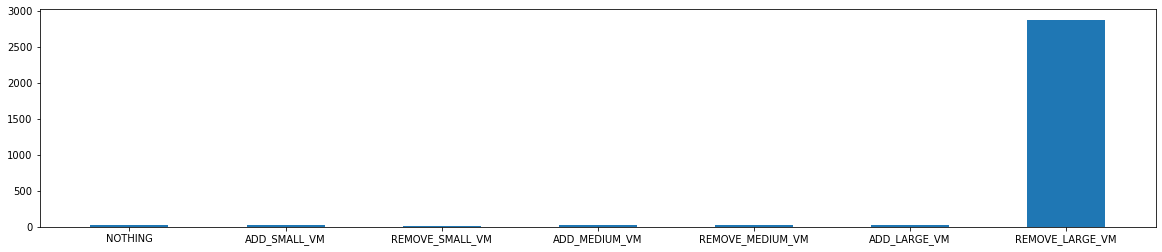

In [10]:
plot_action_histogram(predictions)

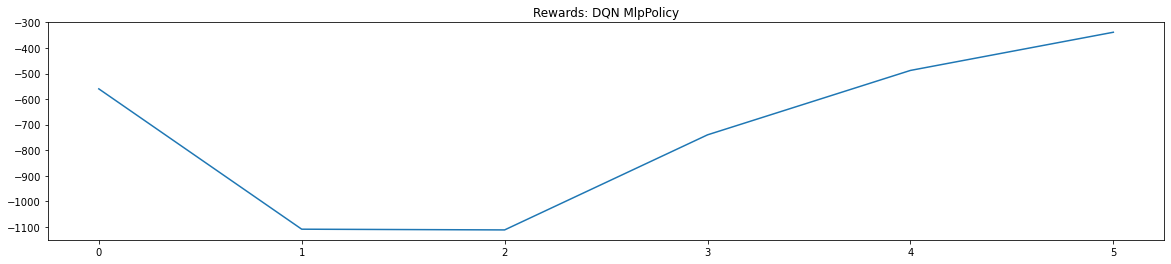

In [11]:
plot_training_data(f'{BASE_PATH}/dqn/MlpPolicy/training_data.csv', data_type='reward', title='DQN MlpPolicy')

In [12]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]

# X_sample = X[N+40:2*(N+40)]
# predictions_sample = predictions[N+40:2*(N+40)]

ig_attributor = IGAttributor(net=dqn_net,
                             agent='dqn',
                             policy='mlp',
                             data=X_sample,
                            predictions=predictions_sample)
mean_attributions = ig_attributor.get_mean_attributions()


torch.Size([500, 1, 7])


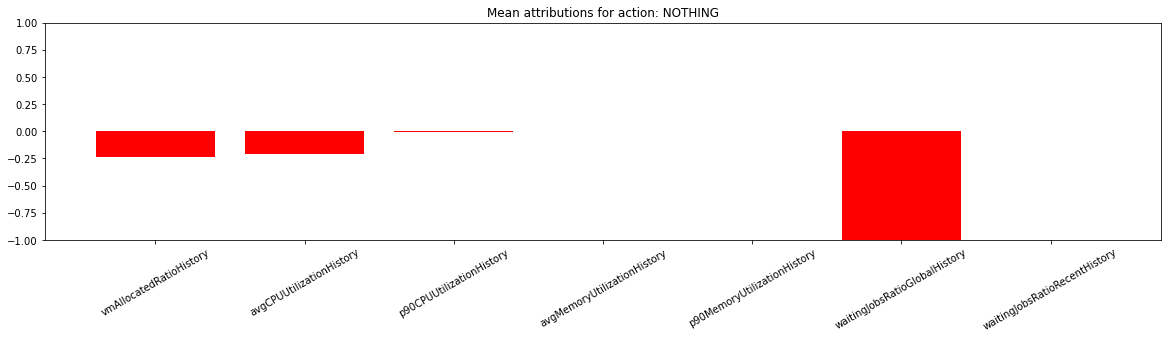

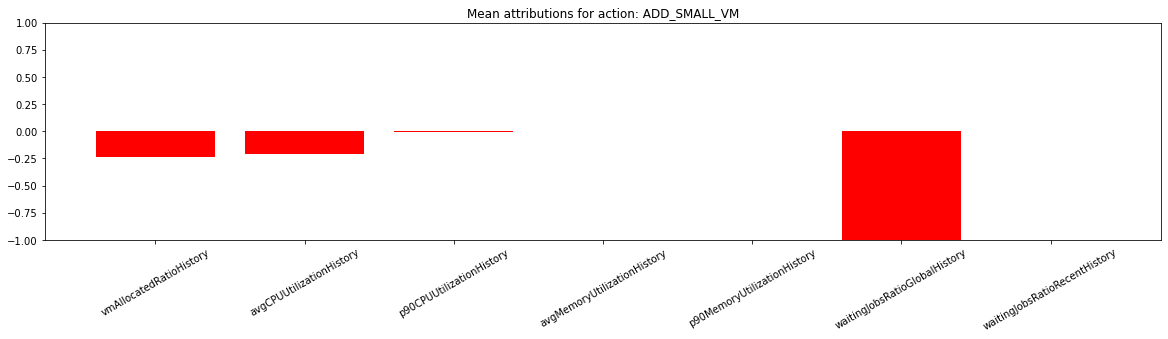

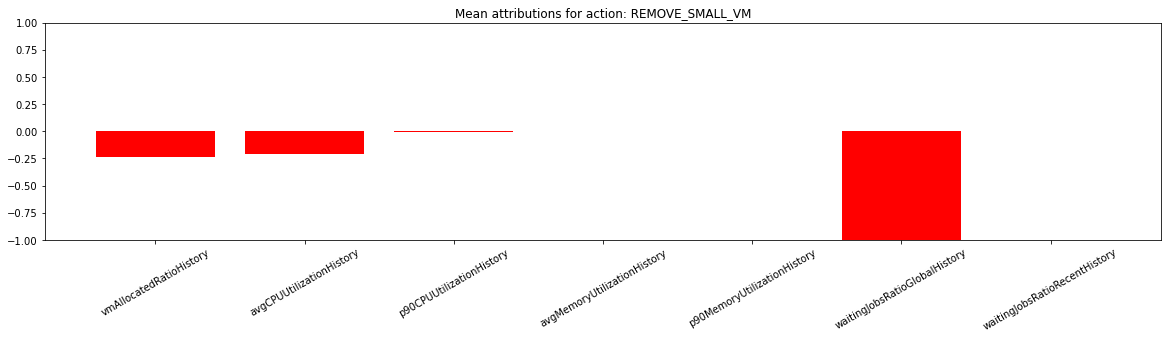

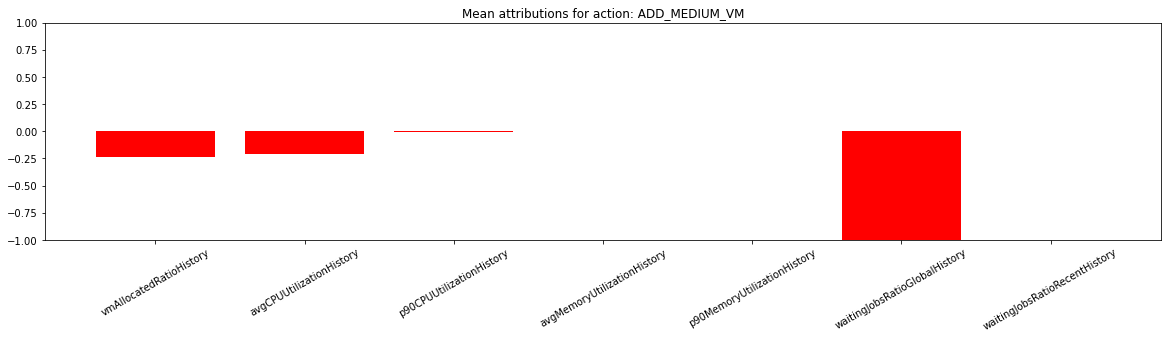

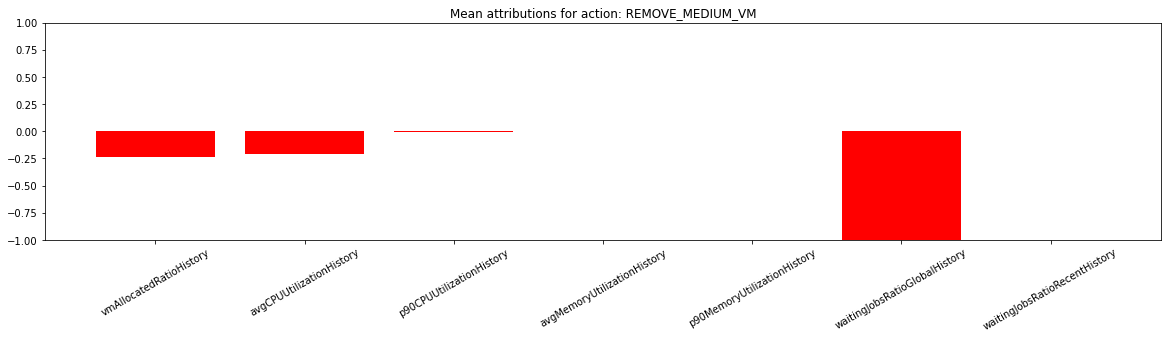

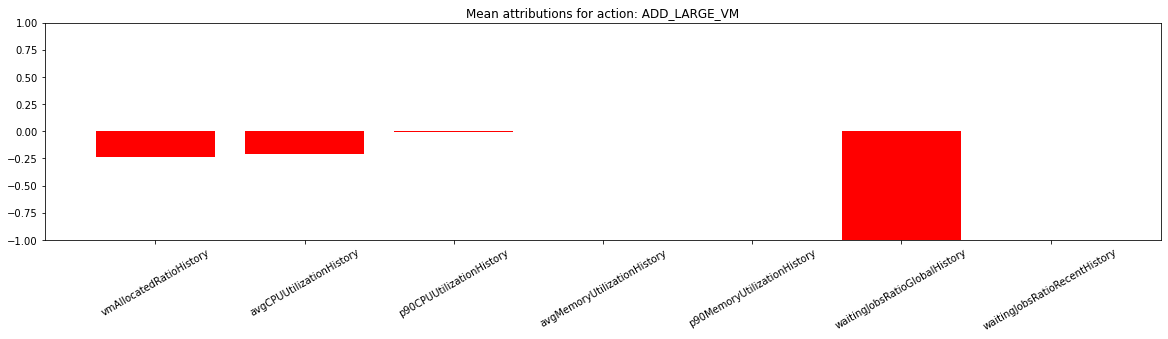

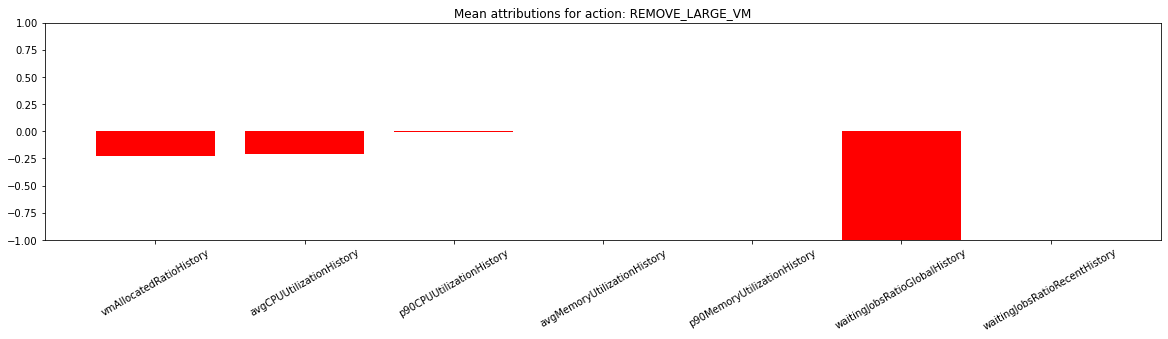

In [13]:
plot_mean_attributions(mean_attributions=mean_attributions)

In [14]:
ig_attributor.attributions[0].shape

(500, 1, 7)

Action made: REMOVE_LARGE_VM
Q-values:
NOTHING: -66.11274719238281
ADD_SMALL_VM: -65.46977996826172
REMOVE_SMALL_VM: -66.0752182006836
ADD_MEDIUM_VM: -66.3282699584961
REMOVE_MEDIUM_VM: -66.03496551513672
ADD_LARGE_VM: -65.6869125366211
REMOVE_LARGE_VM: -63.891761779785156


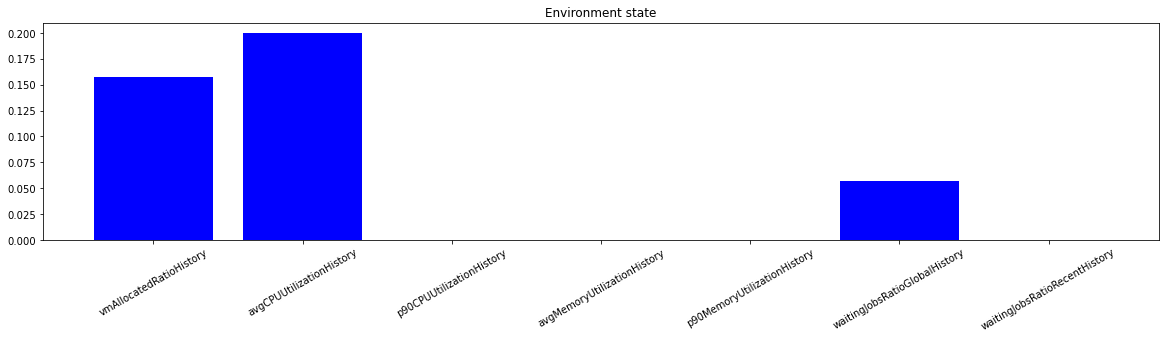

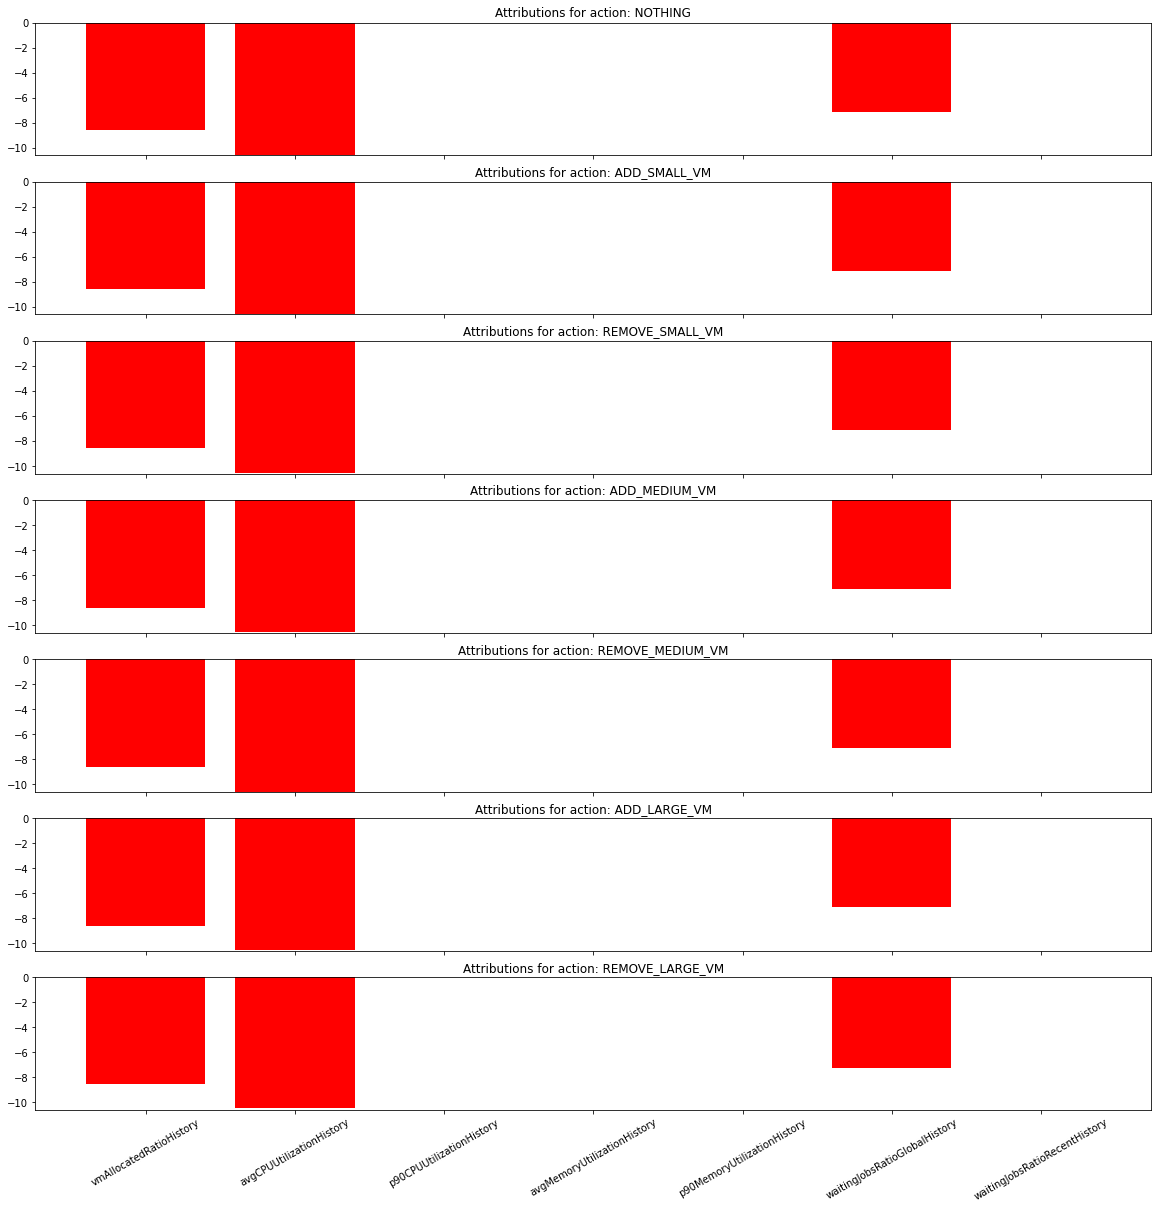

In [16]:
ig_attributor.explain_example(idx=10)

In [17]:
action_observation_map = get_action_observation_map(predictions)

Observation count for each action:
{'ADD_LARGE_VM': 30,
 'ADD_MEDIUM_VM': 26,
 'ADD_SMALL_VM': 23,
 'NOTHING': 30,
 'REMOVE_LARGE_VM': 2873,
 'REMOVE_MEDIUM_VM': 24,
 'REMOVE_SMALL_VM': 19}


In [18]:
idx = action_observation_map['ADD_MEDIUM_VM'].squeeze(1)[:500]

In [19]:
ig_attributor = IGAttributor(net=dqn_net,
                            policy='mlp',
                            agent='dqn',
                            data=X[idx],
                            predictions=predictions[idx])

torch.Size([26, 1, 7])


Action made: REMOVE_LARGE_VM
Q-values:
NOTHING: -63.13071823120117
ADD_SMALL_VM: -62.520240783691406
REMOVE_SMALL_VM: -63.10344696044922
ADD_MEDIUM_VM: -63.356197357177734
REMOVE_MEDIUM_VM: -63.05955505371094
ADD_LARGE_VM: -62.727394104003906
REMOVE_LARGE_VM: -60.98760223388672


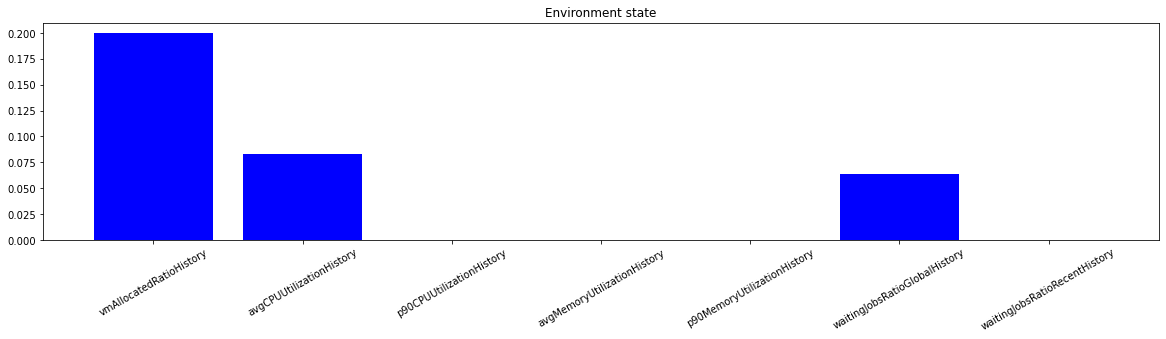

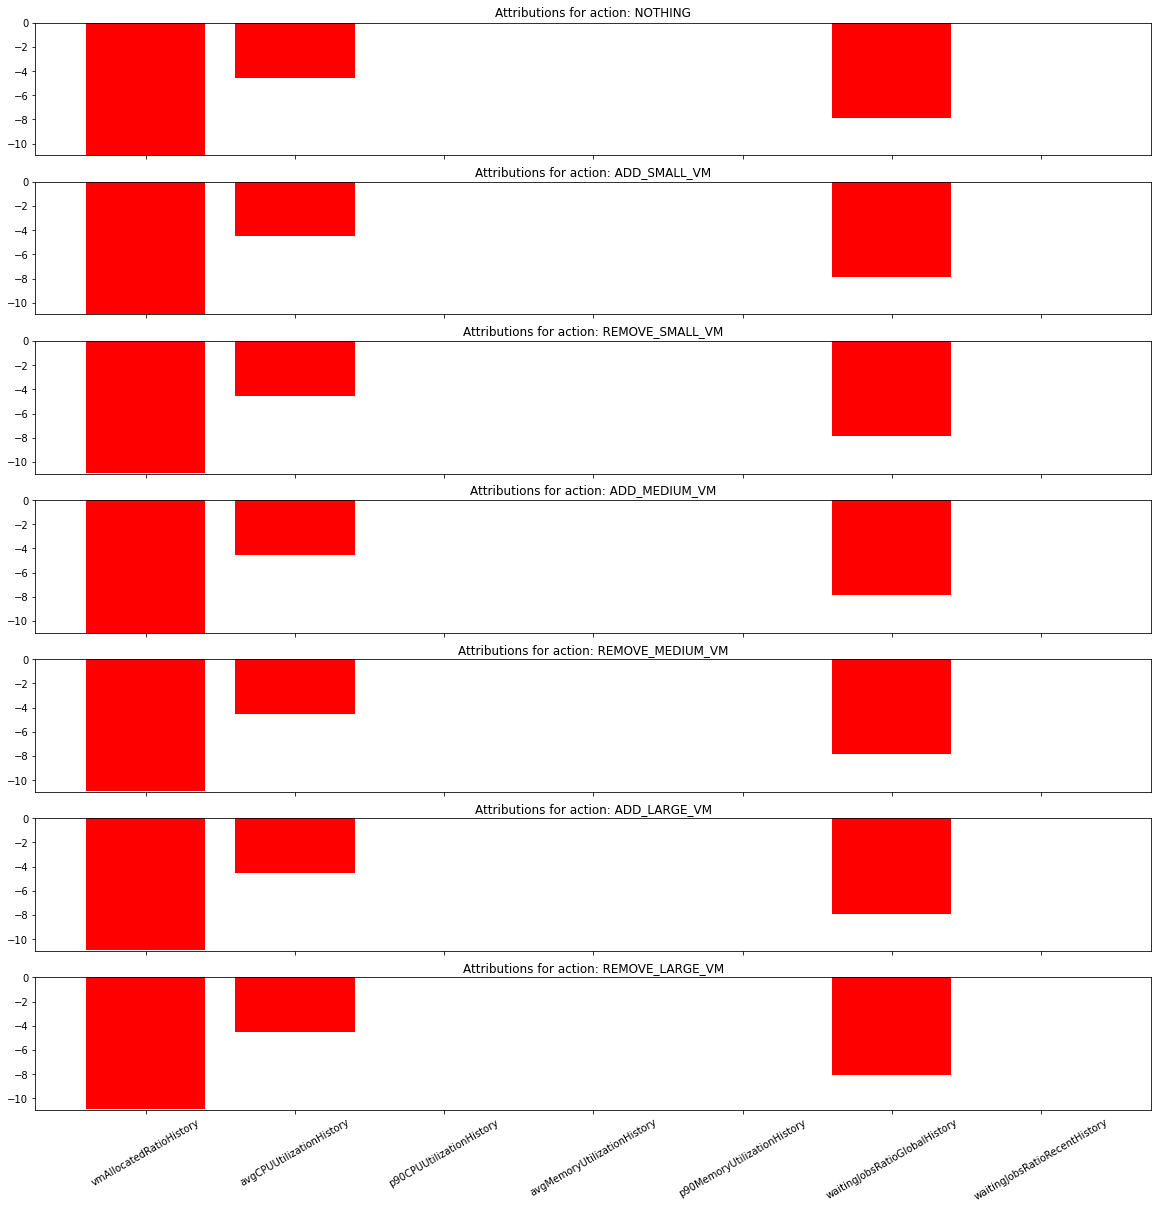

In [20]:
ig_attributor.explain_example(idx=20)

In [21]:
X_manual = torch.Tensor([
    [[0, 1, 1, 1, 1, 1, 1]],
    [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    [[0, 1, 1, 0, 0, 1, 1]],
    [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ])
predictions_manual = []
for _ in X_manual:
    predictions_manual.append(model.predict(X_manual[0])[0][0])
predictions_manual = np.array(predictions_manual)

In [22]:
X_manual.shape

torch.Size([4, 1, 7])

In [23]:
ig_attributor = IGAttributor(net=dqn_net,
                             agent='dqn',
                             policy='mlp',
                             data=X_manual,
                            predictions=predictions_manual)

torch.Size([4, 1, 7])


Action made: ADD_SMALL_VM
Q-values:
NOTHING: -267.8521728515625
ADD_SMALL_VM: -266.6958923339844
REMOVE_SMALL_VM: -267.38861083984375
ADD_MEDIUM_VM: -267.6924743652344
REMOVE_MEDIUM_VM: -267.63055419921875
ADD_LARGE_VM: -267.2732238769531
REMOVE_LARGE_VM: -267.3382263183594


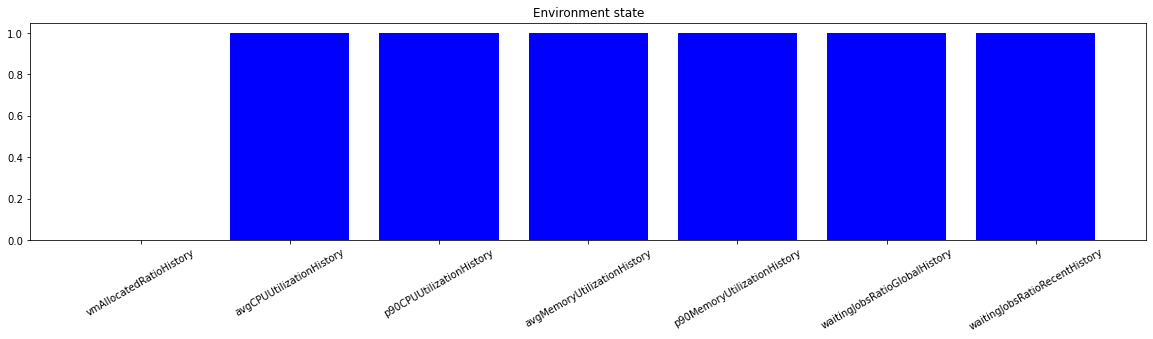

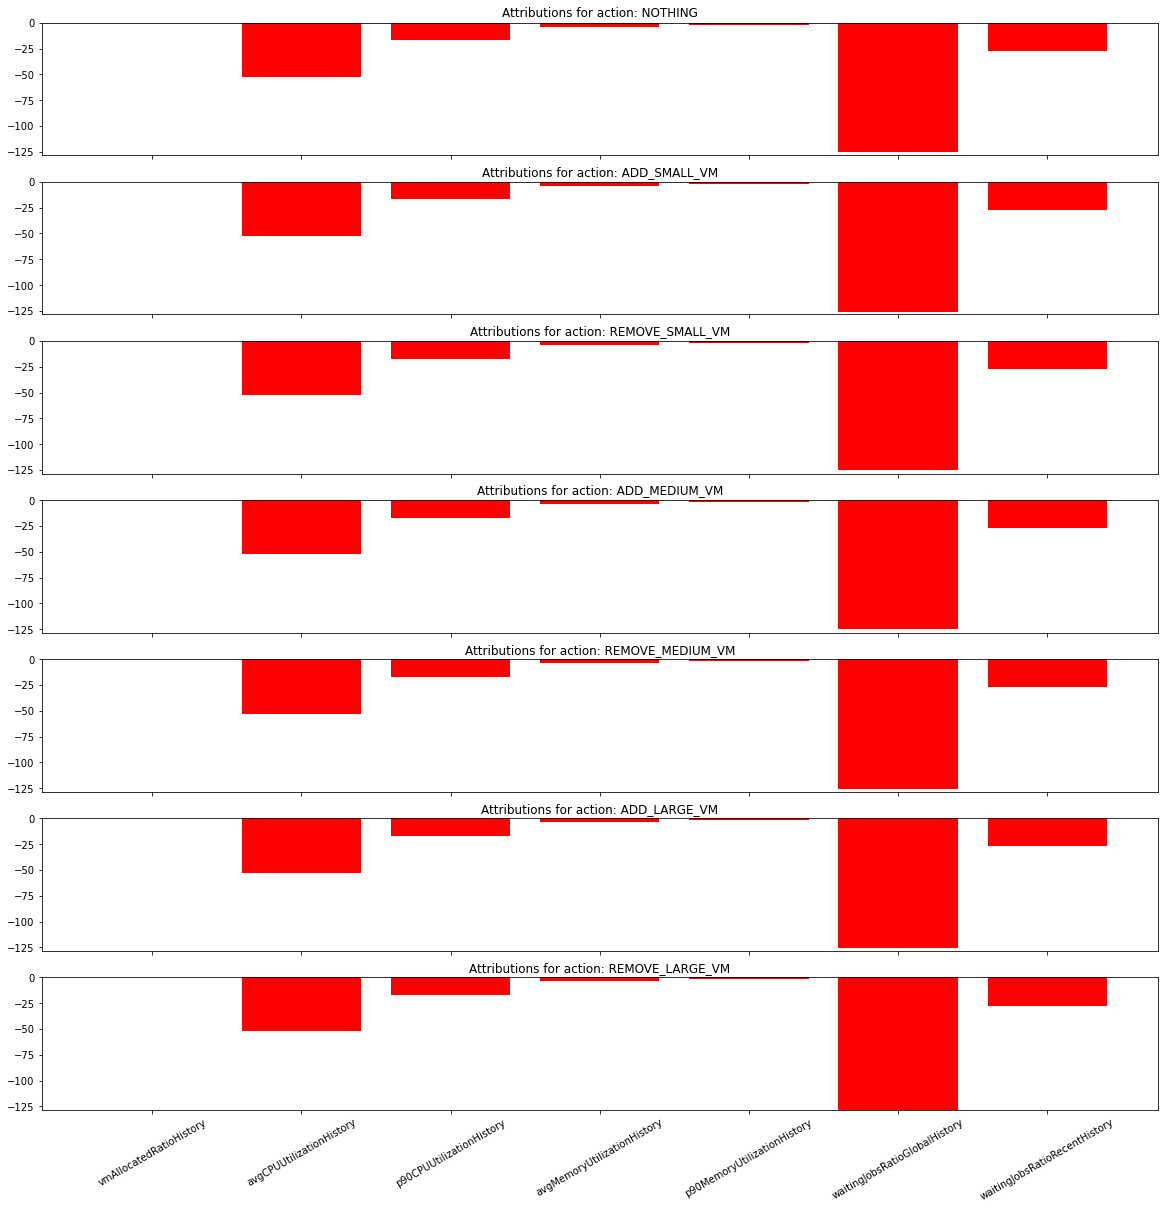

In [24]:
ig_attributor.explain_example(idx=0)